<a href="https://colab.research.google.com/github/ShofiSabilatuss/10222145_ShofiS_AS/blob/main/10222145_ShofiSs_AS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
Dataset ini berisi kumpulan komentar individu yang dikombinasikan dengan label status kesehatan mental masing-masing.
Tujuannya adalah untuk menganalisis hubungan antara ekspresi teks (komentar) dengan kondisi mental seseorang,
misalnya apakah komentar tersebut menunjukkan tanda-tanda depresi, kecemasan, stres, atau kondisi mental yang sehat.
# 2. Penjelasan setiap kolomnya
Kolom terdiri dari 3 kolom :
- id, berupa angka untuk mengidentifikasi setiap entry data.
- statement/comment, berupa teks atau komentar yang ditulis oleh individu.
- status, berupa keterangan status kesehatan mental individu.

In [33]:
!pip install Sastrawi
!pip install nltk

# 3. Import library
import pandas as pd
import random
import numpy as np
random.seed(42)
np.random.seed(42)
import re
import string
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# 4. Load data
data = pd.read_csv('/content/Combined Data.csv', sep=',')
data = data[['statement', 'status']]
data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


## Data Understanding

In [27]:
# 1. Jumlah baris data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB
None


In [15]:
# 2. Panjang rata-rata setiap baris
data['statement_length'] = data['statement'].astype(str).apply(len)
avg_length = data['statement_length'].mean()
print(f"Panjang rata-rata setiap baris (statement): {avg_length:.2f} karakter")

Panjang rata-rata setiap baris (statement): 574.78 karakter


In [16]:
# 3. Cek data duplikasi
duplicates = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")
data[data.duplicated()]
data = data.drop_duplicates()

Jumlah data duplikat: 0


In [17]:
# 4. Cek data kosong
print(data.isnull().sum())
print((data.isnull().sum() / len(data)) * 100)
data = data.dropna()

Unnamed: 0            0
statement           362
status                0
statement_length      0
dtype: int64
Unnamed: 0          0.000000
statement           0.682465
status              0.000000
statement_length    0.000000
dtype: float64


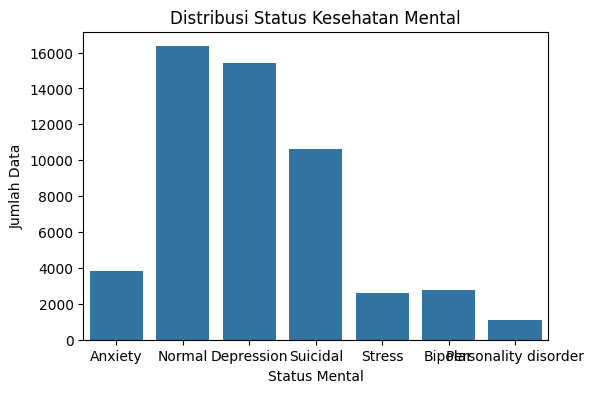

In [22]:
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.figure(figsize=(6,4))
sns.countplot(x='status', data=data)
plt.title('Distribusi Status Kesehatan Mental')
plt.xlabel('Status Mental')
plt.ylabel('Jumlah Data')
plt.show()


## Data Text Processing

In [34]:
# 1. Tokenisasi
data['tokens'] = data['statement'].astype(str).apply(word_tokenize)
data[['statement', 'tokens']].head()

,statement,tokens
0,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest..."
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d..."
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el..."
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be..."


In [35]:
# 2. Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x])
data[['statement', 'lemmatized']].head()

,statement,lemmatized
0,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest..."
2,"All wrong, back off dear, forward doubt. Stay ...","[all, wrong, ,, back, off, dear, ,, forward, d..."
3,I've shifted my focus to something else but I'...,"[i, 've, shifted, my, focus, to, something, el..."
4,"I'm restless and restless, it's been a month n...","[i, 'm, restless, and, restless, ,, it, 's, be..."


In [37]:
# 3. Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
data['stemmed'] = data['lemmatized'].apply(lambda x: [stemmer.stem(word) for word in x])
print("Contoh hasil stemming:\n", data[['statement', 'stemmed']].head())

Contoh hasil stemming:
                                            statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                             stemmed  
0                                     [oh, my, gosh]  
1  [troubl, sleep, ,, confus, mind, ,, restless, ...  
2  [all, wrong, ,, back, off, dear, ,, forward, d...  
3  [i, 've, shift, my, focu, to, someth, els, but...  
4  [i, 'm, restless, and, restless, ,, it, 's, be...  


In [40]:
# 4. Stopword removal (Tanda baca, angka dan kata)
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_tokens(tokens):
    cleaned = [
        word for word in tokens
        if word.isalpha()
        and word not in stop_words
        and word not in string.punctuation
    ]
    return cleaned

data['cleaned'] = data['stemmed'].apply(clean_tokens)
print("\nContoh hasil setelah stopword removal:\n", data[['statement', 'cleaned']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Contoh hasil setelah stopword removal:
                                            statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                             cleaned  
0                                         [oh, gosh]  
1  [troubl, sleep, confus, mind, restless, heart,...  
2  [wrong, back, dear, forward, doubt, stay, rest...  
3           [shift, focu, someth, els, still, worri]  
4             [restless, restless, month, boy, mean]  


In [41]:
# 5. Text Normalisasi
data['normalized'] = data['cleaned'].apply(lambda x: ' '.join(x).lower())
print("\nContoh hasil normalisasi:\n", data[['statement', 'normalized']].head())


Contoh hasil normalisasi:
                                            statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                          normalized  
0                                            oh gosh  
1       troubl sleep confus mind restless heart tune  
2  wrong back dear forward doubt stay restless re...  
3                  shift focu someth els still worri  
4                   restless restless month boy mean  


In [42]:
# 6. Matrix correlation (opsional)
data['text_length'] = data['normalized'].apply(lambda x: len(x.split()))
print("\nKorelasi antara panjang teks dan status mental:")
print(data[['text_length', 'status']].corr(numeric_only=True))


Korelasi antara panjang teks dan status mental:
             text_length
text_length          1.0


In [43]:
# 7. Labeling data (Lexicon, Bert, atau polarity)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['status'])
print("\nMapping Label:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print(data[['status', 'label']].head())


Mapping Label:
{'Anxiety': np.int64(0), 'Bipolar': np.int64(1), 'Depression': np.int64(2), 'Normal': np.int64(3), 'Personality disorder': np.int64(4), 'Stress': np.int64(5), 'Suicidal': np.int64(6)}
    status  label
0  Anxiety      0
1  Anxiety      0
2  Anxiety      0
3  Anxiety      0
4  Anxiety      0


In [44]:
# 8. Text Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)   # gunakan 1000 fitur kata teratas
X = tfidf.fit_transform(data['normalized'])
y = data['label']

print("\nUkuran matriks TF-IDF:", X.shape)


Ukuran matriks TF-IDF: (53043, 1000)


In [45]:
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nJumlah data train:", X_train.shape[0])
print("Jumlah data test:", X_test.shape[0])


Jumlah data train: 42434
Jumlah data test: 10609


## Data Modeling

In [47]:
# Berikan Penjelasan tentang model yang dipilih
Support Vector Machine (SVM) adalah algoritma pembelajaran mesin supervised learning yang digunakan untuk klasifikasi dan regresi.
Konsep utamanya adalah mencari garis pemisah (hyperplane) terbaik yang dapat memisahkan data dari kelas yang berbeda dengan margin (jarak) terbesar.
Model SVM dipilih karena kemampuannya yang unggul dalam menangani data teks berdimensi tinggi dan memberikan hasil klasifikasi yang akurat serta stabil.
Dalam proyek ini, SVM membantu membedakan teks yang mengandung emosi kecemasan (Anxiety) dengan yang tidak (Normal) secara efektif.

## Data Evaluasi

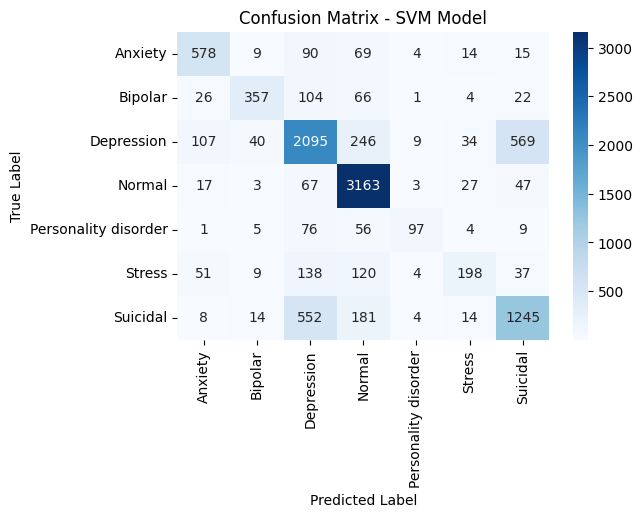

In [48]:
# 1. Confussion Matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
# 2. Laporann Klasifikasi (Classification report)print("\n📊 Classification Report - SVM Model:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                      precision    recall  f1-score   support

             Anxiety       0.73      0.74      0.74       779
             Bipolar       0.82      0.62      0.70       580
          Depression       0.67      0.68      0.67      3100
              Normal       0.81      0.95      0.88      3327
Personality disorder       0.80      0.39      0.52       248
              Stress       0.67      0.36      0.46       557
            Suicidal       0.64      0.62      0.63      2018

            accuracy                           0.73     10609
           macro avg       0.73      0.62      0.66     10609
        weighted avg       0.72      0.73      0.72     10609



## Data Prediksi

In [51]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru
new_comments = [
    "I feel so nervous and can't sleep at night.",
    "Everything is fine, I’m really happy today!",
    "I’m constantly tired and have no motivation.",
    "Sometimes I overthink everything until I panic."
]

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
  tokens = word_tokenize(text.lower())
  tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  tokens = [stemmer.stem(word) for word in tokens]
  return ' '.join(tokens)

new_comments_preprocessed = [preprocess_text(comment) for comment in new_comments]
new_comments_vectorized = tfidf.transform(new_comments_preprocessed)
predicted_labels = svm_model.predict(new_comments_vectorized)
predicted_statuses = label_encoder.inverse_transform(predicted_labels)

for comment, status in zip(new_comments, predicted_statuses):
  print(f"Komentar: {comment}\nStatus: {status}\n")

Komentar: I feel so nervous and can't sleep at night.
Status: Anxiety

Komentar: Everything is fine, I’m really happy today!
Status: Normal

Komentar: I’m constantly tired and have no motivation.
Status: Depression

Komentar: Sometimes I overthink everything until I panic.
Status: Normal

